# **STINTSY Machine Learning Project: Pumpkin Seeds Dataset**

**STINTSY S11 - Milky Way** \
*Group Members:*
- Gutierrez, Mark Daniel
- Refuerzo, Lloyd Dominic
- Romblon, Kathleen Mae
- Stinson, Audrey Lauren

## **1** | **Introduction**

The pumpkin plant belongs to the Cucurbitaceae family and has seasonal varieties. Confectionery pumpkins, grown in Turkey, are usually produced from the pumpkin species, *Cucurbita pepo* L and sometimes from the *Cucurbita moschata* Duchesne type. Pumpkin seeds are considered as important for human health because it contains 37 percent of carbohydrate, 35 percent to 40 percent of fat and protein along with calcium, potassium, phosphorus, magnesium, iron, and zinc. Pumpkins are divided into many types, and one of these species is known as “Urgup Sivrisi”. Urgup Sivrisi is a type of pumpkin seed that has a long, white, very bright, thin, and hardly distinguishable shell with a pointed tip. The other type of pumpkin seeds is “Cercevelik”. It is a particular species grown in Turkey, Nevsehir, Karacaoren, and known as “Topak” in Turkey. <span style="color:#42adf5">(*taken directly from* Details *section of the Pumpkin Seeds Dataset pdf*)</span>

The target task for this dataset is to correctly classify whether an image of a pumpkin seed is of the species type "Urgup Sivrisi" or "Cercevelik". The dataset then offers a <span style="color:#f5b942">classification problem</span> that the group will address through the use of various machine learning models, namely **k-Nearest Neighbors**, **Decision Trees**, and **Logistic Regression**.

## **2** | **About the Dataset**

The dataset, collected by Koklu et al. (2021), contains extracted features from 2500 images of two varieties of pumpkin seeds, Urgup Sivrisi and Cercevelik. These images were taken inside a product shooting box to prevent shadows from showing if light from outside of the box were to get in. To process the original RGB images, they were converted to gray-toned images, and then to binary images to simplify the value of each pixel in the image. As the RGB images will be converted to binary images for the image processing part, the shadows can make the acquired size and shape of the seed appear smaller.

From the image binarization of each of the 2500 images, 12 features were extracted for each instance. The extracted features are based on the shape of the pumpkin seeds, where each pixel in the image was calculated while considering the values of other nearby pixels.

As such, the extracted features are as follows:

1. <span style="color:#f5b942">Area:</span> Number of pixels within the borders of a pumpkin seed
2. <span style="color:#f5b942">Perimeter:</span> Circumference in pixels of a pumpkin seed
3. <span style="color:#f5b942">Major Axis Length:</span> Large axis distance of a pumpkin seed
4. <span style="color:#f5b942">Minor Axis Length:</span> Small axis distance of a pumpkin seed
5. <span style="color:#f5b942">Convex Area:</span> Number of pixels of the smallest convex shell at the region formed by the pumpkin seed
6. <span style="color:#f5b942">Equiv Diameter:</span> Computed as $\sqrt{4a/\pi}$, where $a$ is the area of the pumpkin seed
7. <span style="color:#f5b942">Eccentricity:</span> Eccentricity of a pumpkin seed
8. <span style="color:#f5b942">Solidity:</span> Convex condition of the pumpkin seeds
9. <span style="color:#f5b942">Extent:</span> Ratio of a pumpkin seed area to the bounding box pixels
10. <span style="color:#f5b942">Roundness:</span> Ovality of pumpkin seeds without considering the distortion of the edges
11. <span style="color:#f5b942">Aspect Ration:</span> Aspect ratio of the pumpkin seeds
12. <span style="color:#f5b942">Compactness:</span> Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference

## **3** | **List of Requirements**

The following cell imports the libraries needed to run the notebook:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

## **4** | **Data Preprocessing**

### *Importing the dataset*

For the following cell, we will be using the `read_csv` function to import the pumpkin seeds dataset to our notebook.

In [2]:
data = pd.read_csv('pumpkin_seeds.csv')

To check that we have imported the data, we can take a look at the first and last 10 instances in the dataset.

In [3]:
data.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Çerçevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Çerçevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Çerçevelik


In [4]:
data.tail(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2490,51555,934.911,401.8321,164.7038,52013,256.2067,0.9121,0.9912,0.7187,0.7412,2.4397,0.6376,Ürgüp Sivrisi
2491,69836,1010.605,396.6286,224.7918,70419,298.1911,0.8239,0.9917,0.6693,0.8593,1.7644,0.7518,Ürgüp Sivrisi
2492,84236,1274.656,456.9323,237.1540,85248,327.4944,0.8548,0.9881,0.6104,0.6515,1.9267,0.7167,Ürgüp Sivrisi
2493,58987,977.410,404.0779,186.3710,59518,274.0522,0.8873,0.9911,0.7327,0.7759,2.1681,0.6782,Ürgüp Sivrisi
2494,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [5]:
# (no. of instances, no. of columns [features + target label])
data.shape

(2500, 13)

The dataset consists of 13 columns, where the first 12 columns are the input features and the last column is the target label. There are 2500 instances in total, and the shape of the dataset is `(2500, 13)`.

Optionally, we can see the statistical summary of the dataset by calling the `describe()` function.

In [6]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


### *Data Cleaning*

As we can see, one of the features, `Aspect_Ration`, is spelled incorrectly. To fix this, we will rename that column to `Aspect_Ratio`.

In [7]:
#renaming and reformatting the features
data.columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter',
                'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ratio', 'Compactness', 'Class']

The class labels can be renamed so that it only includes letters from the English alphabet, and this will be done by running the following cell block.

In [8]:
data['Class'] = data['Class'].str.strip().str.title().replace({'Çerçevelik': 'Cercevelik'})
data['Class'] = data['Class'].str.strip().str.title().replace({'Ürgüp Sivrisi': 'Urgup Sivrisi'})
#data.info()
#data.hist(figsize=(12,12))
#plt.show()

In continuation, we can check if there are other representations of the Class column by calling the `unique()` function on it. Since there are only two unique values, we do not need to make any changes for this column for now.

In [9]:
data['Class'].unique()

array(['Cercevelik', 'Urgup Sivrisi'], dtype=object)

Using the `info()` function, we can check any feature with incorrect datatype. If there are inconsistencies with the datatype, it is likely to be assigned an `object` datatype. It should also be noted that for features that we would usually assume to have a `string` datatype, it is possible that they have `object` datatype.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ratio       2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Only one of these features have the `object` datatype assigned to it, which is the `Class` column. However, since we have already queried its unique values in the previous section, we know that there shouldn't be inconsistencies in this column, so we can keep this column as is.

Next, we need to check if there are any missing values or instances where a default value has been assigned. In a pandas dataframe, these are usually represented as `None` or `NaN`, so we can query for any null values in our dataset. Additionally, we can also check if there are any duplicated instances.

In [11]:
display(data.isnull().sum())
display(data.duplicated().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ratio         0
Compactness          0
Class                0
dtype: int64

0

Now that we have finished checking the data, we can now split the data into features (`X`) and the target label (`y`).

In [12]:
#split features and label
X = data.drop(columns=['Class']).values
y = data['Class'].values

Some models may require that our features are normalized, so we'll define a normalized X variable using the `MinMaxScaler` library's `fit_transform()` function.

In [13]:
#normalize
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

Our class labels can be represented numerically. To do this, we use the `LabelEncoder` library's `fit_transform()` function on our target label `y` to represent **Cercevelik** as class `0` and **Urgup Sivrisi** as class `1`.

In [14]:
#Encode Cercevelik as 0, Urgup Sivrisi as 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#Check if y is properly transformed
np.unique(y)

array([0, 1])

Similarly, for the purposes of our exploratory data analysis, we will also transform the `Class` column in our dataframe so that **Cercevelik** is represented as `0` and **Urgup Sivrisi** is represented as class `1`. We will be doing this in a temporary dataframe so as not to affect the original dataframe with the named labels.

In [15]:
temp_df = data

# temp_df['Class'] = label_encoder.fit_transform(temp_df['Class'])

temp_df['Class'].unique()

array(['Cercevelik', 'Urgup Sivrisi'], dtype=object)

## **5** | **Exploratory Data Analysis**

There are some things that we can take into consideration when trying to classify a pumpkin seed. As this is a dataset that contains morphological features of the two specific species of pumpkin seeds, we can explore the features that represent the size and the shape of the seed. Some of the EDA questions that we have come up with are listed in the following:

*General:*
- How much of the data are Cercevelik pumpkin seeds and Urgup Sivrisi pumpkin seeds?

*Size:*
- What are the features of the seed that has the smallest perimeter? The largest?
    - What is the average perimeter of each of the pumpkin seeds?
- What are the features of the most narrow seed of each pumpkin seed? The widest?
    - What is the average width of each of the pumpkin seeds?
- What are the features of the shortest seed of each pumpkin seed? The longest?
    - What is the average length of each of the pumpkin seeds?

*Shape:*
- What are the features of the most circular seed for each of the pumpkin seed species? The most elongated?
    - What is the average eccentricity of each of the pumpkin seed species?
- What are the features of the least round seed for each of the pumpkin seed species? The most round?
    - What is the average roundness of each of the pumpkin seed species?
- <span style="color:red">Convex area</span>

### How much of the data are Cercevelik pumpkin seeds and Urgup Sivrisi pumpkin seeds?

To get the count of each of the pumpkin seed species in the dataset, we can group our dataset by `Class` and call the `size()` function on it.

In [16]:
# Count of each pumpkin seed
seed_counts = temp_df.groupby('Class').size()

seed_counts

Class
Cercevelik       1300
Urgup Sivrisi    1200
dtype: int64

As we can see, there are 1300 Cercevelik pumpkin seeds and 1200 Urgup Sivrisi pumpkin seeds in the dataset. Since we have grouped our dataset by `Class`, we can assign these groups to their own variables so that we can further explore our data. We would also need to reset the index so that both of the new dataframes start at index `0`.

In [17]:
# Group according to class (Cercevelik or Urgup Sivrisi)
groups = temp_df.groupby('Class')

# Assign to their own variables to check in further EDA questions
cercevelik_seeds, urgup_seeds = groups.get_group("Cercevelik"), groups.get_group("Urgup Sivrisi")

In [18]:
# Reset index for Cercevelik
cercevelik_seeds = cercevelik_seeds.reset_index()

# Drop index column
cercevelik_seeds.drop(columns="index", axis=1, inplace=True)

In [19]:
# Reset index for Urgup Sivrisi
urgup_seeds = urgup_seeds.reset_index()

# Drop index column
urgup_seeds.drop(columns="index", axis=1, inplace=True)

We can check the new dataframes in the following cells.

In [20]:
cercevelik_seeds

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Cercevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Cercevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Cercevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Cercevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Cercevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,64276,1002.303,366.1481,226.6391,65696,286.0747,0.7854,0.9784,0.7404,0.8040,1.6156,0.7813,Cercevelik
1296,77715,1059.272,403.2743,246.8762,78525,314.5629,0.7907,0.9897,0.7397,0.8704,1.6335,0.7800,Cercevelik
1297,69528,1049.346,414.5252,215.1771,70426,297.5329,0.8547,0.9872,0.6144,0.7935,1.9264,0.7178,Cercevelik
1298,59466,912.152,340.6951,222.9567,59949,275.1626,0.7561,0.9919,0.7382,0.8981,1.5281,0.8077,Cercevelik


In [21]:
urgup_seeds

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
0,76910,1146.880,483.5875,203.5562,77745,312.9295,0.9071,0.9893,0.7629,0.7348,2.3757,0.6471,Urgup Sivrisi
1,118751,1468.224,629.7230,240.9782,120036,388.8425,0.9239,0.9893,0.7440,0.6922,2.6132,0.6175,Urgup Sivrisi
2,86565,1215.697,508.1608,218.3103,87292,331.9909,0.9030,0.9917,0.7189,0.7360,2.3277,0.6533,Urgup Sivrisi
3,72106,1131.138,484.9191,193.0989,72800,302.9987,0.9173,0.9905,0.6187,0.7082,2.5112,0.6248,Urgup Sivrisi
4,86686,1208.535,509.7207,216.9252,87352,332.2229,0.9049,0.9924,0.7411,0.7458,2.3498,0.6518,Urgup Sivrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Urgup Sivrisi
1196,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Urgup Sivrisi
1197,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Urgup Sivrisi
1198,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Urgup Sivrisi


The following plot shows how many seeds there are in each of the species in graph form, and compares them side by side.

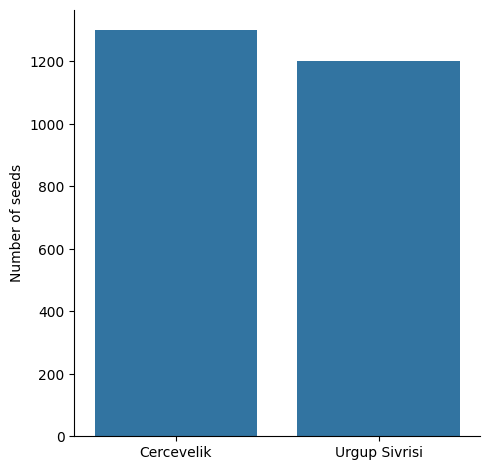

In [22]:
g = sns.catplot(data=temp_df,x='Class',kind='count')
g.set_axis_labels("", "Number of seeds")
g.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

The following few questions are questions created for probing on the **Size** of the seeds. The features that we think are relevant to learning about the difference in size between the two pumpkin seed species are `Perimeter`, `Minor Axis Length`, and `Major Axis Length`.

### What are the features of the seed that has the smallest perimeter?

In [23]:
# Cercevelik min perimeter
cercevelik_perim_min = cercevelik_seeds['Perimeter'].min()
# Index
cercevelik_perim_min_idx = cercevelik_seeds['Perimeter'].idxmin()

print("Cercevelik seed with smallest perimeter =", cercevelik_perim_min) # Value
cercevelik_seeds.iloc[[cercevelik_perim_min_idx]] # Instance

Cercevelik seed with smallest perimeter = 888.242


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Cercevelik


In [24]:
# Urgup sivrisi min perimeter
urgup_perim_min = urgup_seeds['Perimeter'].min()
# Index
urgup_perim_min_idx = urgup_seeds['Perimeter'].idxmin()

print("Urgup Sivrisi seed with smallest perimeter =", urgup_perim_min) # Value
urgup_seeds.iloc[[urgup_perim_min_idx]] # Instance

Urgup Sivrisi seed with smallest perimeter = 868.485


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
521,47939,868.485,359.103,170.1768,48366,247.0584,0.8806,0.9912,0.7378,0.7987,2.1102,0.688,Urgup Sivrisi


### The largest?

In [25]:
# Cercevelik max perimeter
cercevelik_perim_max = cercevelik_seeds['Perimeter'].max()
# Index
cercevelik_perim_max_idx = cercevelik_seeds['Perimeter'].idxmax()

print("Cercevelik seed with largest perimeter =", cercevelik_perim_max) # Value
cercevelik_seeds.iloc[[cercevelik_perim_max_idx]] # Instance

Cercevelik seed with largest perimeter = 1416.303


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
226,102803,1416.303,614.8959,216.4382,104364,361.7912,0.936,0.985,0.7472,0.644,2.841,0.5884,Cercevelik


In [26]:
# Urgup sivrisi max perimeter
urgup_perim_max = urgup_seeds['Perimeter'].max()
# Index
urgup_perim_max_idx = urgup_seeds['Perimeter'].idxmax()

print("Urgup Sivrisi seed with largest perimeter =", urgup_perim_max) # Value
urgup_seeds.iloc[[urgup_perim_max_idx]] # Instance

Urgup Sivrisi seed with largest perimeter = 1559.45


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
745,136574,1559.45,661.9113,267.385,138384,417.0029,0.9148,0.9869,0.5313,0.7057,2.4755,0.63,Urgup Sivrisi


### What is the average perimeter of each of the pumpkin seeds?

In [27]:
cercevelik_perim_avg = cercevelik_seeds['Perimeter'].mean()

print("Cercevelik seed average perimeter =", cercevelik_perim_avg)

Cercevelik seed average perimeter = 1089.5224876923078


In [28]:
urgup_perim_avg = urgup_seeds['Perimeter'].mean()

print("Urgup Sivrisi seed average perimeter =", urgup_perim_avg)

Urgup Sivrisi seed average perimeter = 1174.4319191666668


### What are the features of the most narrow seed of each pumpkin seed?

In [29]:
# Cercevelik min minor axis
cercevelik_miax_min = cercevelik_seeds['Minor_Axis_Length'].min()
# Index
cercevelik_miax_min_idx = cercevelik_seeds['Minor_Axis_Length'].idxmin()

print("Value of most narrow Cercevelik seed =", cercevelik_miax_min) # Value
cercevelik_seeds.iloc[[cercevelik_miax_min_idx]] # Instance

Value of most narrow Cercevelik seed = 185.844


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
1203,59260,1007.878,413.3942,185.844,60066,274.6856,0.8933,0.9866,0.7395,0.7331,2.2244,0.6645,Cercevelik


In [30]:
# Urgup sivrisi min minor axis
urgup_miax_min = urgup_seeds['Minor_Axis_Length'].min()
# Index
urgup_miax_min_idx = urgup_seeds['Minor_Axis_Length'].idxmin()

print("Value of most narrow Urgup Sivrisi seed =", urgup_miax_min) # Value
urgup_seeds.iloc[[urgup_miax_min_idx]] # Instance

Value of most narrow Urgup Sivrisi seed = 152.1718


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
535,55082,1037.748,464.2759,152.1718,55733,264.8256,0.9448,0.9883,0.6255,0.6427,3.051,0.5704,Urgup Sivrisi


### The widest?

In [31]:
# Cercevelik max minor axis
cercevelik_miax_max = cercevelik_seeds['Minor_Axis_Length'].max()
# Index
cercevelik_miax_max_idx = cercevelik_seeds['Minor_Axis_Length'].idxmax()

print("Value of widest Cercevelik seed =", cercevelik_miax_max) # Value
cercevelik_seeds.iloc[[cercevelik_miax_max_idx]] # Instance

Value of widest Cercevelik seed = 305.818


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
1273,104272,1209.475,436.0609,305.818,105567,364.3669,0.7128,0.9877,0.7356,0.8957,1.4259,0.8356,Cercevelik


In [32]:
# Urgup sivrisi max minor axis
urgup_miax_max = urgup_seeds['Minor_Axis_Length'].max()
# Index
urgup_miax_max_idx = urgup_seeds['Minor_Axis_Length'].idxmax()

print("Value of widest Urgup Sivrisi seed =", urgup_miax_max) # Value
urgup_seeds.iloc[[urgup_miax_max_idx]] # Instance

Value of widest Urgup Sivrisi seed = 297.7952


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
691,135455,1451.905,580.8759,297.7952,136373,415.2911,0.8586,0.9933,0.6928,0.8075,1.9506,0.7149,Urgup Sivrisi


### What is the average width of each of the pumpkin seeds?

In [33]:
cercevelik_miax_avg = cercevelik_seeds['Minor_Axis_Length'].mean()

print("Cercevelik seed average Minor Axis Length or Width =", cercevelik_miax_avg)

Cercevelik seed average Minor Axis Length or Width = 234.77692869230768


In [34]:
urgup_miax_avg = urgup_seeds['Minor_Axis_Length'].mean()

print("Urgup Sivrisi seed average Minor Axis Length or Width =", urgup_miax_avg)

Urgup Sivrisi seed average Minor Axis Length or Width = 216.064413


### What are the features of the shortest seed of each pumpkin seed?

In [35]:
# Cercevelik min major axis
cercevelik_majax_min = cercevelik_seeds['Major_Axis_Length'].min()
# Index
cercevelik_majax_min_idx = cercevelik_seeds['Major_Axis_Length'].idxmin()

print("Value of shortest Cercevelik seed =", cercevelik_majax_min) # Value
cercevelik_seeds.iloc[[cercevelik_majax_min_idx]] # Instance

Value of shortest Cercevelik seed = 320.8446


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
1194,66204,1006.743,320.8446,279.3001,67295,290.3335,0.4921,0.9838,0.6315,0.8208,1.1487,0.9049,Cercevelik


In [36]:
# Urgup Sivrisi min major axis
urgup_majax_min = urgup_seeds['Major_Axis_Length'].min()
# Index
urgup_majax_min_idx = urgup_seeds['Major_Axis_Length'].idxmin()

print("Value of shortest Urgup Sivrisi seed =", urgup_majax_min) # Value
urgup_seeds.iloc[[urgup_majax_min_idx]] # Instance

Value of shortest Urgup Sivrisi seed = 324.0113


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
326,54128,871.458,324.0113,214.0405,54742,262.5222,0.7507,0.9888,0.728,0.8957,1.5138,0.8102,Urgup Sivrisi


### The longest?

In [37]:
# Cercevelik max major axis
cercevelik_majax_max = cercevelik_seeds['Major_Axis_Length'].max()
# Index
cercevelik_majax_max_idx = cercevelik_seeds['Major_Axis_Length'].idxmax()

print("Value of longest Cercevelik seed =", cercevelik_majax_max) # Value
cercevelik_seeds.iloc[[cercevelik_majax_max_idx]] # Instance

Value of longest Cercevelik seed = 614.8959


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
226,102803,1416.303,614.8959,216.4382,104364,361.7912,0.936,0.985,0.7472,0.644,2.841,0.5884,Cercevelik


In [38]:
# Urgup Sivrisi max major axis
urgup_majax_max = urgup_seeds['Major_Axis_Length'].max()
# Index
urgup_majax_max_idx = urgup_seeds['Major_Axis_Length'].idxmax()

print("Value of longest Urgup Sivrisi seed =", urgup_majax_max) # Value
urgup_seeds.iloc[[urgup_majax_max_idx]] # Instance

Value of longest Urgup Sivrisi seed = 661.9113


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
745,136574,1559.45,661.9113,267.385,138384,417.0029,0.9148,0.9869,0.5313,0.7057,2.4755,0.63,Urgup Sivrisi


### What is the average length of each of the pumpkin seeds?

In [39]:
cercevelik_majax_avg = cercevelik_seeds['Major_Axis_Length'].mean()

print("Cercevelik seed average Major Axis Length or Length =", cercevelik_majax_avg)

Cercevelik seed average Major Axis Length or Length = 426.27261500000003


In [40]:
urgup_majax_avg = urgup_seeds['Major_Axis_Length'].mean()

print("Urgup Sivrisi seed average Major Axis Length or Length =", urgup_majax_avg)

Urgup Sivrisi seed average Major Axis Length or Length = 489.45850075000004


The following few questions are questions created for probing on the *Shape** of the seeds. The features that we think are relevant to learning about the difference in shape between the two pumpkin seed species are `Eccentricity`, `Roundness`, and `Convex Area`.

### What are the features of the most circular seed for each of the pumpkin seed species?

In [41]:
# Cercevelik min eccentricity
cercevelik_ecce_min = cercevelik_seeds['Eccentricity'].min()
# Index
cercevelik_ecce_min_idx = cercevelik_seeds['Eccentricity'].idxmin()

print("Value of most circular Cercevelik seed =", cercevelik_ecce_min) # Value
cercevelik_seeds.iloc[[cercevelik_ecce_min_idx]] # Instance

Value of most circular Cercevelik seed = 0.4921


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
1194,66204,1006.743,320.8446,279.3001,67295,290.3335,0.4921,0.9838,0.6315,0.8208,1.1487,0.9049,Cercevelik


In [42]:
# Urgup sivrisi min eccentricity
urgup_ecce_min = urgup_seeds['Eccentricity'].min()
# Index
urgup_ecce_min_idx = urgup_seeds['Eccentricity'].idxmin()

print("Value of most circular Urgup Sivrisi seed =", urgup_ecce_min) # Value
urgup_seeds.iloc[[urgup_ecce_min_idx]] # Instance

Value of most circular Urgup Sivrisi seed = 0.7507


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
326,54128,871.458,324.0113,214.0405,54742,262.5222,0.7507,0.9888,0.728,0.8957,1.5138,0.8102,Urgup Sivrisi


### The most elongated?

In [43]:
# Cercevelik max eccentricity
cercevelik_ecce_max = cercevelik_seeds['Eccentricity'].max()
# Index
cercevelik_ecce_max_idx = cercevelik_seeds['Eccentricity'].idxmax()

print("Value of most elongated Cercevelik seed =", cercevelik_ecce_max) # Value
cercevelik_seeds.iloc[[cercevelik_ecce_max_idx]] # Instance

Value of most elongated Cercevelik seed = 0.936


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
226,102803,1416.303,614.8959,216.4382,104364,361.7912,0.936,0.985,0.7472,0.644,2.841,0.5884,Cercevelik


In [44]:
# Urgup sivrisi max eccentricity
urgup_ecce_max = urgup_seeds['Eccentricity'].max()
# Index
urgup_ecce_max_idx = urgup_seeds['Eccentricity'].idxmax()

print("Value of most elongated Urgup Sivrisi seed =", urgup_ecce_max) # Value
urgup_seeds.iloc[[urgup_ecce_max_idx]] # Instance

Value of most elongated Urgup Sivrisi seed = 0.9481


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
761,90597,1352.215,605.5829,192.588,91557,339.6346,0.9481,0.9895,0.4695,0.6226,3.1444,0.5608,Urgup Sivrisi


### What is the average eccentricity of each of the pumpkin seed species?

In [45]:
cercevelik_ecce_avg = cercevelik_seeds['Eccentricity'].mean()

print("Cercevelik seed average eccentricity =", cercevelik_ecce_avg)

Cercevelik seed average eccentricity = 0.8305382307692308


In [46]:
urgup_ecce_avg = urgup_seeds['Eccentricity'].mean()

print("Urgup Sivrisi seed average eccentricity =", urgup_ecce_avg)

Urgup Sivrisi seed average eccentricity = 0.8937489999999999


### What are the features of the least round seed for each of the pumpkin seed species?

In [47]:
# Cercevelik min roundness
cercevelik_round_min = cercevelik_seeds['Roundness'].min()
# Index
cercevelik_round_min_idx = cercevelik_seeds['Roundness'].idxmin()

print("Value of least round Cercevelik seed =", cercevelik_round_min) # Value
cercevelik_seeds.iloc[[cercevelik_round_min_idx]] # Instance

Value of least round Cercevelik seed = 0.6153


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
1265,61712,1122.674,370.2319,214.4666,62992,280.3108,0.8151,0.9797,0.7008,0.6153,1.7263,0.7571,Cercevelik


In [48]:
# Urgup sivrisi min roundness
urgup_round_min = urgup_seeds['Roundness'].min()
# Index
urgup_round_min_idx = urgup_seeds['Roundness'].idxmin()

print("Value of least round Urgup Sivrisi seed =", urgup_round_min) # Value
urgup_seeds.iloc[[urgup_round_min_idx]] # Instance

Value of least round Urgup Sivrisi seed = 0.5546


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
76,55045,1116.756,398.7896,177.7192,56734,264.7366,0.8952,0.9702,0.7954,0.5546,2.2439,0.6639,Urgup Sivrisi


### The most round?

In [49]:
# Cercevelik max roundness
cercevelik_round_max = cercevelik_seeds['Roundness'].max()
# Index
cercevelik_round_max_idx = cercevelik_seeds['Roundness'].idxmax()

print("Value of least round Cercevelik seed =", cercevelik_round_max) # Value
cercevelik_seeds.iloc[[cercevelik_round_max_idx]] # Instance

Value of least round Cercevelik seed = 0.9396


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
653,69132,961.531,342.3836,257.6274,69616,296.6843,0.6586,0.993,0.7391,0.9396,1.329,0.8665,Cercevelik


In [50]:
# Urgup sivrisi max roundness
urgup_round_max = urgup_seeds['Roundness'].max()
# Index
urgup_round_max_idx = urgup_seeds['Roundness'].idxmax()

print("Value of least round Urgup Sivrisi seed =", urgup_round_max) # Value
urgup_seeds.iloc[[urgup_round_max_idx]] # Instance

Value of least round Urgup Sivrisi seed = 0.8967


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ratio,Compactness,Class
617,89350,1118.993,425.7468,267.8436,90118,337.2891,0.7773,0.9915,0.7264,0.8967,1.5895,0.7922,Urgup Sivrisi


### What is the average roundness of each of the pumpkin seed species?

In [51]:
cercevelik_round_avg = cercevelik_seeds['Roundness'].mean()

print("Cercevelik seed average roundness =", cercevelik_round_avg)

Cercevelik seed average roundness = 0.8274985384615386


In [52]:
urgup_round_avg = urgup_seeds['Roundness'].mean()

print("Urgup Sivrisi seed average roundness =", urgup_round_avg)

Urgup Sivrisi seed average roundness = 0.7525698333333334


**=========================================================================================================================================**

### Correlation Checking

Let’s play around with the data and find association among them. First, we check the correlation between features and labels.

In [53]:
# temp_df['Class'] = label_encoder.fit_transform(temp_df['Class'])
# temp_df.corr()['Class'].sort_values()

As shown above, the four features which have strongest relationship with Class are <b>Aspect_Ratio, Eccentricity, Major_Axis_Length and Perimeter</b>.

Then we display the correlations of each combination of two features.

In [54]:
# corr = temp_df.corr().round(2)
# sns.heatmap(corr,cmap="rocket",annot=True)

The brighter the color is, the stronger the relationship between 2 variables.<br>
Notably, 3 features have perfect positive correlation with each other: `Area`, `Convex_Area` and `Equiv_Diameter`. Since these features have almost the same correlations with `Class`, these features could be dropped from the training dataset.<br>
Other closely correlated features are `Aspect_Ratio` and `Eccentricity` with $0.95$ correlation, then `Perimeter` with `Area`, `Convex_Area` and `Equiv_Diameter` with $0.93$ correlation. Meanwhile, `Compactness` and `Aspect_Ratio` are highly inversely correlated at $-0.99$ correlation, implying `Compactness` decreases with increasing `Aspect_Ratio`.

Let’s plot some interesting pattern.

### The number of data in each class

In [55]:
# g = sns.catplot(data=temp_df,x='Class',kind='count')
# g.set_axis_labels("", "Number of seeds")
# g.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

We can see that in the dataset, the number of instances classified as Çerçevelik seeds is slightly more than that of Ürgüp Sivrisi.

### Boxplot

We display the relationship between Class and the first four features which have strongest relationship with it.

In [56]:
# # Boxplot
# f = plt.figure(figsize=(12,8))

# plt.subplot(2,2,1)
# # Aspect_Ration vs Class
# a=sns.boxplot(data=temp_df,x='Class',y='Aspect_Ratio')
# a.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

# plt.subplot(2,2,2)
# # Eccentricity vs Class
# b=sns.boxplot(data=temp_df,x='Class',y='Eccentricity')
# b.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

# plt.subplot(2,2,3)
# # Major_Axis_Length vs Class
# c=sns.boxplot(data=temp_df,x='Class',y='Major_Axis_Length')
# c.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

# plt.subplot(2,2,4)
# # Perimeter vs Class
# d=sns.boxplot(data=temp_df,x='Class',y='Perimeter')
# d.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

Ürgüp Sivrisi has a higher median in all 4 features. Since these features are related to shape and size, this may imply that Ürgüp Sivrisi seeds are generally bigger and more elongated than Çerçevelik seeds.

### Scatterplot

As we can see from the correlation plot, some other combinations of the variables also show strong relationships (around 0.95). Let’s have a look at the four of them.

In [57]:
# #The relationships among other features
# f = plt.figure(figsize=(16,12))
# #Roundness vs. Compactness
# plt.subplot(2,2,1)
# sns.scatterplot(data=temp_df,x='Compactness', y='Roundness',hue='Class')
# plt.grid()

# #Perimeter vs. Major_Axis_Length
# plt.subplot(2,2,2)
# sns.scatterplot(data=temp_df,x='Perimeter', y='Major_Axis_Length',hue='Class')
# plt.grid()

# #Perimeter vs. Area
# plt.subplot(2,2,3)
# sns.scatterplot(data=temp_df,x='Perimeter', y='Area',hue='Class')
# plt.grid()

# #Perimeter vs. Convex_Area
# plt.subplot(2,2,4)
# sns.scatterplot(data=temp_df,x='Perimeter', y='Convex_Area',hue='Class')
# plt.grid()

The scatterplot is divided according to their class. As you can see two features got very strong relationships. While they don’t have strong relationships with **Class**, which can be seen from the distribution of orange and blue points, representing two different seed classes. The distribution of two classes doesn’t appear like cluster.

## **6** | **Initial Model Training**

### *Model 1: K-Nearest Neighbors*

<b>Setting up Libraries and Datasets</b>

First, we import the needed libraries for KNN model training.

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Evaluation metrics for later analysis

We'll split the data to training set (70%) and testing set (30%). The training set will be used to train the model while the testing set will be used for evaluation of the model.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1)
print("Training Features (X_train):\n", X_train)
print("Training Labels (y_train):\n", y_train)
print("Testing Features (X_test):\n", X_test)
print("Testing Labels (y_test):\n", y_test)

Training Features (X_train):
 [[0.26154454 0.28994522 0.32398179 ... 0.59142857 0.44956657 0.39755885]
 [0.11275456 0.05150767 0.03912695 ... 0.87298701 0.17572781 0.73205464]
 [0.28294692 0.27203259 0.23053555 ... 0.69480519 0.28145513 0.58849172]
 ...
 [0.25996503 0.22470169 0.25160152 ... 0.77012987 0.33947988 0.51874455]
 [0.33038867 0.27929924 0.29133099 ... 0.79662338 0.32304455 0.53879686]
 [0.29046088 0.33104137 0.34768947 ... 0.55714286 0.44881495 0.39581517]]
Training Labels (y_train):
 [0 0 0 ... 0 0 0]
Testing Features (X_test):
 [[0.5803238  0.52078181 0.51605595 ... 0.70935065 0.39955905 0.45074106]
 [0.46750155 0.42055965 0.39749468 ... 0.73090909 0.3382773  0.51816332]
 [0.49841485 0.48096792 0.46795451 ... 0.64467532 0.40411886 0.44173205]
 ...
 [0.26437638 0.30036543 0.29173619 ... 0.57142857 0.39635216 0.45451904]
 [0.35894398 0.38222341 0.4074294  ... 0.58883117 0.4620935  0.38419064]
 [0.28870085 0.36542806 0.43875084 ... 0.46935065 0.59958912 0.26009881]]
Testing 

<b>Hyperparameter Tuning with Cross-Validation</b>

In training the model, we'll need to find a good value for the hyperparameter `k`, the number of neighbors.
We'll test values from 1-20 and get the average cross-validation accuracy of the model on each `k`. The accuracy will be stored in `accuracy_scores`.

In [60]:
k_choices = range(1, 21)
accuracy_scores = []
for k in k_choices:
    knn = KNeighborsClassifier(n_neighbors=k) # Instantiate
    score = cross_val_score(knn, X_train, y_train, cv=10).mean() # Get the avg cross-val accuracy
    accuracy_scores.append(score)

Let's plot the accuracy scores of each k.

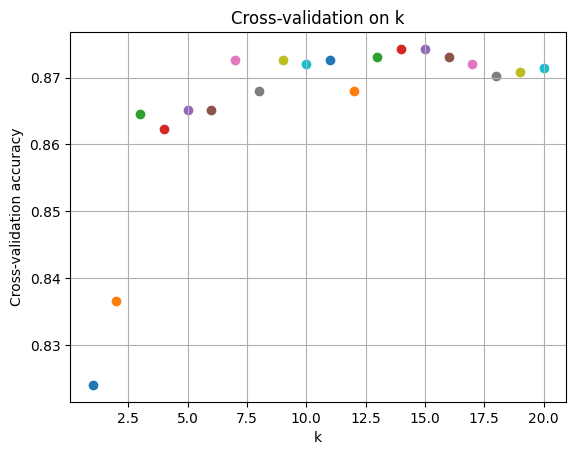

In [61]:
for i in range(len(accuracy_scores)):
    plt.scatter(k_choices[i], accuracy_scores[i])
plt.xlabel("k")
plt.ylabel("Cross-validation accuracy")
plt.title("Cross-validation on k")
plt.grid()
plt.show()

The best `k` seems to be between $12.5$ and $15.0$, with a cross-validation accuracy higher than 0.87. Now let's compute this based on the accuracy scores.

In [62]:
best_k = k_choices[np.argmax(accuracy_scores)]
print("Best k:", best_k)
print("Accuracy:", max(accuracy_scores))

Best k: 14
Accuracy: 0.8742857142857143


Let's train the model using the best `k` ($14$).

In [63]:
knn = KNeighborsClassifier(n_neighbors=best_k) # Instantiate with best k
knn.fit(X_train, y_train) # Train

KNeighborsClassifier(n_neighbors=14)

Let's test the model on the testing data.

In [64]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

### *Model 2: Decision Tree*

Importing the libraries needed for decision tree classifier -> **TO MOVE TO SECTION 3**

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

As we have a classification problem in our hands, we will be using the `DecisionTreeClassifier` library from `sklearn` for training our decision tree model on the pumpkin seeds dataset.

<span style="color:red">why decision tree?</span>

In the following cell, we will be splitting our train (70%) and test (30%) data. It is enough to use the original, non-normalized data for decision trees as normalization does not affect the performance of the model.

*On data normalization:* <br> https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/ <br>
https://sebastianraschka.com/faq/docs/when-to-standardize.html

In [66]:
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(X,y,test_size=0.3,random_state=1)
# print("X train: \n" + str(X_train))
# print("y train: \n" + str(y_train))
# print("X test: \n" + str(X_test))
# print("y test: \n" + str(y_test))

In [67]:
print("X_train shape : ", dt_X_train.shape)
print("y_train shape : ", dt_y_train.shape)
print("X_test shape : ", dt_X_test.shape)
print("y_test shape : ", dt_y_test.shape)

X_train shape :  (1750, 12)
y_train shape :  (1750,)
X_test shape :  (750, 12)
y_test shape :  (750,)


After splitting, we end up with training data that has 1750 instances and test data with 750 instances.

For this part of the decision tree modeling, we will be using the default parameters for the `DecisionTreeClassifier` to see its baseline performance. In the following cell, we will be defining our decision tree as `pumpkin_dt`.

In [68]:
pumpkin_dt = DecisionTreeClassifier()

We will be fitting the decision tree model on the training data and creating predictions on the test data in the following cells.

In [69]:
# Fit the model
pumpkin_dt.fit(dt_X_train, dt_y_train)

DecisionTreeClassifier()

In [70]:
# Test predictions
pumpkin_dt_test_preds = pumpkin_dt.predict(dt_X_test)
pumpkin_dt_test_preds

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

Now that we have fitted the decision tree model and created predictions on our test data, we can describe and visualize our tree.

The following cell contains the definition of the function for describing the decisiont tree. The tree structure description is taken from this page in scikit-learn: <br> https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [71]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [72]:
describe_tree(pumpkin_dt)

The binary tree structure has 369 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 6] <= 0.8713499903678894 else to node 246.
	node=1 is a split node: go to node 2 if X[:, 10] <= 1.905049979686737 else to node 139.
		node=2 is a split node: go to node 3 if X[:, 0] <= 107589.5 else to node 138.
			node=3 is a split node: go to node 4 if X[:, 11] <= 0.7415499985218048 else to node 77.
				node=4 is a split node: go to node 5 if X[:, 8] <= 0.6166499853134155 else to node 6.
					node=5 is a leaf node, values: [[0. 3.]].
					node=6 is a split node: go to node 7 if X[:, 3] <= 259.89634704589844 else to node 66.
						node=7 is a split node: go to node 8 if X[:, 7] <= 0.9917500019073486 else to node 53.
							node=8 is a split node: go to node 9 if X[:, 3] <= 203.00475311279297 else to node 12.
								node=9 is a split node: go to node 10 if X[:, 1] <= 937.7369995117188 else to node 11.
									node=10 is a leaf node, values: [[3. 0.]].
									n

We ended up getting a tree structure for our test data that has 367 nodes in total. At the root node, it looks at the feature at index 6 to ask the first question, and this feature is the `Eccentricity` of the pumpkin seed.

We can also plot our tree as a graph by calling the `plot_tree` function from `sklearn.tree`.

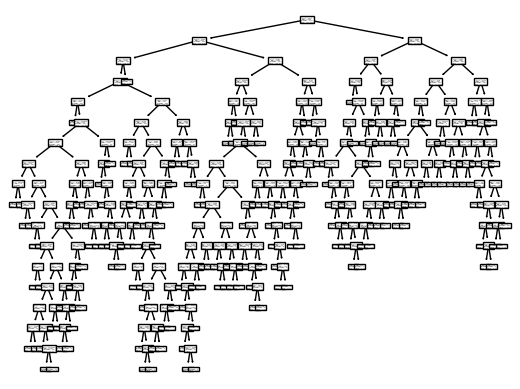

In [73]:
tree.plot_tree(pumpkin_dt)
plt.show()

We can get the confusion matrix, classification report, and the test accuracy for the tree now that we have visualized it.

In [74]:
# Confusion matrix of the model
print("Confusion Matrix:")
print(confusion_matrix(dt_y_test, pumpkin_dt_test_preds))

Confusion Matrix:
[[309  70]
 [ 64 307]]


Note that Çerçevelik is encoded as 0 and Ürgüp Sivrisi as 1. The confusion matrix resulted in the following values:
- **True Positives:** 310 instances were labeled correctly as Urgup Sivrisi.
- **True Negatives:** 305 instances were labeled correctly as Cercevelik.
- **False Negatives:** 61 instances were labeled incorrectly as Cercevelik.
- **False Positives:** 74 instances were labeled incorrectly as Urgup Sivrisi.

From the classification report, we can get the evaluation metrics of the model. We can also get the accuracy of the model by separately calling the `accuracy_score()` function.

In [75]:
print("Classification Report:")
print(classification_report(dt_y_test, pumpkin_dt_test_preds, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(dt_y_test, pumpkin_dt_test_preds))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.83      0.82      0.82       379
Urgup Sivrisi       0.81      0.83      0.82       371

     accuracy                           0.82       750
    macro avg       0.82      0.82      0.82       750
 weighted avg       0.82      0.82      0.82       750

Test Accuracy: 0.8213333333333334


The baseline default model resulted in a test accuracy of `0.828` for this dataset. We can improve this through hyperparameter tuning.

<span style="color:red">*What values to consider for each hyperparameter to tune? What basis*</span>

Some regularization techniques for decision trees are deciding on the stopping criterion. We can modify the parameters of the `DecisionTreeClassifier()` model so that our model stops asking questions once it reaches certain thresholds. For this model, we can tune the following parameters: `criterion`, `min_samples_split`, `max_depth`, and `max_leaf_nodes`.

In [76]:
# Hyperparameters to tune: criterion, min_samples_split, max_depth, max_leaf_nodes
# Values considered for hyperparams can still be changed based on related works found
hyperparameters = [
    {
        "criterion" : ["gini", "entropy"],
        "min_samples_split" : [10,20,50,100,500,1000,2000],
        "max_depth" : [10,20,50,100,500],
        "max_leaf_nodes" : [10,20,50,100,500,1000,1500]
    }
]

Through the `RandomizedSearchCV()`, we can find the best hyperparameters using cross-validation. Since we've defined our hyperparameter options in the previous cell, we can just input this as our parameter for `param_distributions` using 5-fold cross-validation. <br>
*Optionally: explain why RandomizedSearchCV over other search algorithms for determining the best hyperparameters* <br>
*Some sources: https://insidelearningmachines.com/tune_hyperparameters_in_decision_trees/*

In [77]:
# n_iter: number of parameter settings to be sampled
# cv: number of cross validation folds
rsc_pumpkin = RandomizedSearchCV(estimator=pumpkin_dt,param_distributions=hyperparameters,n_iter=100,cv=5)

We can now fit our data to this `RandomizedSearchCV` model, and it finds the best parameters for us.

In [78]:
rsc_pumpkin.fit(dt_X_train,dt_y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [10, 20, 50, 100, 500],
                                         'max_leaf_nodes': [10, 20, 50, 100,
                                                            500, 1000, 1500],
                                         'min_samples_split': [10, 20, 50, 100,
                                                               500, 1000,
                                                               2000]}])

By calling the `best_params_` variable, we can get the dictionary of best hyperparameter values for our tuned decision tree model.

In [79]:
rsc_pumpkin.best_params_

{'min_samples_split': 100,
 'max_leaf_nodes': 10,
 'max_depth': 10,
 'criterion': 'gini'}

Now that we have the best hyperparameters based from `RandomizedSearchCV`, we can define a new estimator model based on these hyperparameters. We follow the same pipeline as the baseline model, in which we fit the model using our train data and create predictions on our test data.

In [80]:
pumpkin_dt_tuned = DecisionTreeClassifier(min_samples_split=100, max_leaf_nodes=10, max_depth=20,criterion="gini")

In [81]:
pumpkin_dt_tuned.fit(dt_X_train,dt_y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=10, min_samples_split=100)

In [82]:
pumpkin_dt_tuned_preds = pumpkin_dt_tuned.predict(dt_X_test)
pumpkin_dt_tuned_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

Now that we have fitted the tuned decision tree model and created predictions on our test data, we can describe and visualize this tuned tree.

In [83]:
describe_tree(pumpkin_dt_tuned)

The binary tree structure has 19 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 10] <= 2.0382500886917114 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 6] <= 0.8511500060558319 else to node 4.
	node=2 is a split node: go to node 5 if X[:, 6] <= 0.8832499980926514 else to node 6.
		node=3 is a split node: go to node 9 if X[:, 4] <= 108591.5 else to node 10.
		node=4 is a split node: go to node 7 if X[:, 7] <= 0.991349995136261 else to node 8.
		node=5 is a split node: go to node 13 if X[:, 7] <= 0.9905499815940857 else to node 14.
		node=6 is a leaf node, values: [[ 30. 590.]].
			node=7 is a split node: go to node 11 if X[:, 1] <= 978.4070129394531 else to node 12.
			node=8 is a leaf node, values: [[19. 39.]].
			node=9 is a split node: go to node 17 if X[:, 11] <= 0.7415499985218048 else to node 18.
			node=10 is a leaf node, values: [[0. 6.]].
				node=11 is a leaf node, values: [[2. 9.]].
				node=12 is a split node: go to 

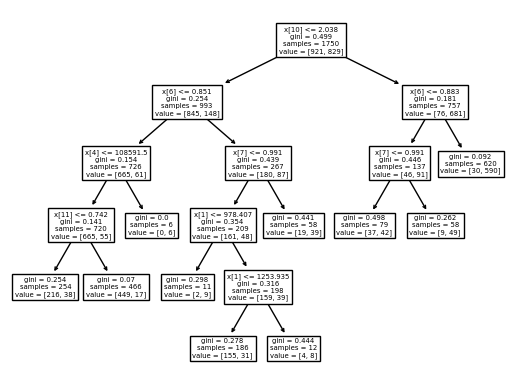

In [84]:
tree.plot_tree(pumpkin_dt_tuned)
plt.show()

We significantly ended up with lesser nodes and a more shallow depth of tree. Our tuned tree now has 19 nodes, and at the root node, it looks at the feature at index 6 to ask the first question. This is the same as our original tree, and it asks about the `Eccentricity` of the pumpkin seed.

### *Model 3: Logistic Regression*

Since the dataset mainly consists of 2 classes ("Cercevelik" and "Urgup Sivrisi"), we can use Logistic Regression in predicting the pumpkin seed class based on the provided features.  This is primarily because Logistic Regression excels in binary classification problems.  The dataset's features, including area, perimeter, major axis lengths, and others, provide valuable information for predicting seed class.

We will use `sklearn`'s `SGDClassifier` to create our logistic regression model. A binomial logistic regression is optimal for our model since there are only two classes (`Çerçevelik` or `Ürgüp Sivrisi`) in our dataset.

We will split the data into 70% for the training set and 30% for the testing set.

We will use the normalized data to ensure reliable and efficient SGDClassifier performance.

In [85]:
logreg_X_train, logreg_X_test, logreg_y_train, logreg_y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1)
print("X_train shape : ", logreg_X_train.shape)
print("y_train shape : ", logreg_y_train.shape)
print("X_test shape : ", logreg_X_test.shape)
print("y_test shape : ", logreg_y_test.shape)

X_train shape :  (1750, 12)
y_train shape :  (1750,)
X_test shape :  (750, 12)
y_test shape :  (750,)


Visualize the train data.

Text(0.5, 1.0, 'Train data')

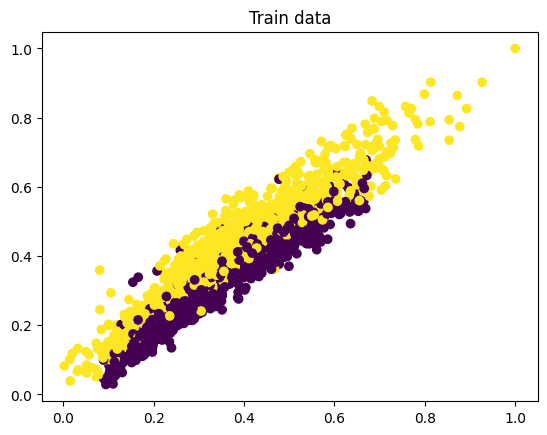

In [86]:
plt.scatter(logreg_X_train[:, 0], logreg_X_train[:, 1], c=logreg_y_train)
plt.title('Train data')

Visualize the test data.

Text(0.5, 1.0, 'Test data')

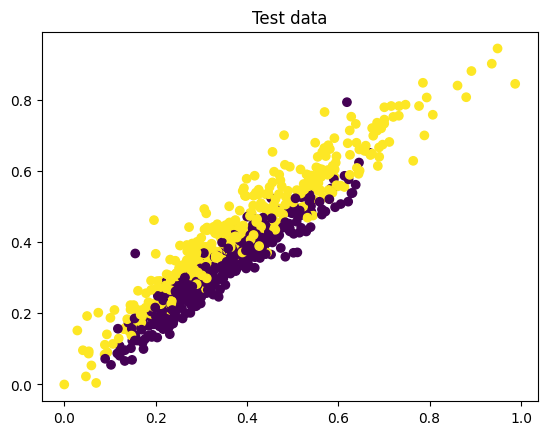

In [87]:
plt.scatter(logreg_X_test[:, 0], logreg_X_test[:, 1], c=logreg_y_test)
plt.title('Test data')

Import the `SGDClassifier` class.

In [88]:
from sklearn.linear_model import SGDClassifier

**Setting `SGDClassifier` parameters**

| Name                      | Parameter       | Value      | Description                                                                                                                     |
|---------------------------|-----------------|------------|---------------------------------------------------------------------------------------------------------------------------------|
| **Loss function**         | `loss`          | 'log_loss' | Set to `'log_loss'` for logistic regression.                                                                                    |
| **Initial learning rate** | `eta0`          | 0.001      | Set the initial learning rate to a small value (`0.001`) to ensure gradual updates, preventing overshooting optimal parameters. |
| **Maximum iterations**    | `max_iter`      | 200        | Limit the training iterations to `200` to prevent overfitting.                                                                  |
| **Learning rate**         | `learning_rate` | 'constant' | Maintain a constant learning rate throughout training.                                                                          |
| **Random state**          | `random_state`  | 1          | Ensure reproducibility by fixing the random seed.                                                                               |
| **Verbose**               | `verbose`       | 1          | Display training progress.                                                                                                      |

In [89]:
logreg = SGDClassifier(
    loss='log_loss',
    eta0=0.001,
    max_iter=200,
    learning_rate='constant',
    random_state=1,
    verbose=1,
)

Train the model by calling the `fit()` function

In [90]:
logreg.fit(logreg_X_train, logreg_y_train)

-- Epoch 1
Norm: 0.21, NNZs: 12, Bias: -0.028420, T: 1750, Avg. loss: 0.679999
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 12, Bias: -0.029970, T: 3500, Avg. loss: 0.656103
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 12, Bias: -0.041565, T: 5250, Avg. loss: 0.634575
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.78, NNZs: 12, Bias: -0.040902, T: 7000, Avg. loss: 0.615108
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.95, NNZs: 12, Bias: -0.048916, T: 8750, Avg. loss: 0.597496
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.11, NNZs: 12, Bias: -0.056832, T: 10500, Avg. loss: 0.581523
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.27, NNZs: 12, Bias: -0.051700, T: 12250, Avg. loss: 0.566833
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.41, NNZs: 12, Bias: -0.067736, T: 14000, Avg. loss: 0.553692
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.56, NNZs: 12, Bias: -0.062887, T: 15750, Avg. loss: 0.541551
Total

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=1, verbose=1)

To see if our model does well, we test our trained model on the test set and get the prediction results.


In [91]:
logreg_pred = logreg.predict(logreg_X_test)
print(logreg_pred)

[0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 

## **7** | **Error Analysis**

### *Model 1: K-Nearest Neighbors*

Let's evaluate the KNN model. First, let's print out the confusion matrix.

In [92]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[346  33]
 [ 65 306]]


Note that Çerçevelik is encoded as `0` and Ürgüp Sivrisi as `1`.  
<b>True positives:</b> $306$ instances were labeled correctly as Ürgüp Sivrisi.<br>
<b>True negatives:</b> $346$ instances were labeled correctly as Çerçevelik.<br>
<b>False negatives:</b> $65$ instances were labeled incorrectly as Çerçevelik.<br>
<b>False positives:</b> $33$ instances were labeled incorrectly as Ürgüp Sivrisi.<br>

Let's get the evaluation metrics per class using `classification_report()`, and then the overall test accuracy.

In [93]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.84      0.91      0.88       379
Urgup Sivrisi       0.90      0.82      0.86       371

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750

Test Accuracy: 0.8693333333333333


### *Model 2: Decision Trees*

We can now get the confusion matrix of the results of the tuned Decision Tree model.

In [94]:
# Confusion matrix of the model
print("Confusion Matrix:")
print(confusion_matrix(dt_y_test, pumpkin_dt_tuned_preds))

Confusion Matrix:
[[321  58]
 [ 41 330]]


Note that Çerçevelik is encoded as 0 and Ürgüp Sivrisi as 1. The confusion matrix of the tuned tree resulted in the following values:
- **True Positives:** 330 instances were labeled correctly as Urgup Sivrisi.
- **True Negatives:** 321 instances were labeled correctly as Cercevelik.
- **False Negatives:** 41 instances were labeled incorrectly as Cercevelik.
- **False Positives:** 58 instances were labeled incorrectly as Urgup Sivrisi.

From the classification report, we can get the evaluation metrics of the tuned model. We can also get its accuracy by separately calling the `accuracy_score()` function.

In [95]:
print("Classification Report:")
print(classification_report(y_test, pumpkin_dt_tuned_preds, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, pumpkin_dt_tuned_preds))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.89      0.85      0.87       379
Urgup Sivrisi       0.85      0.89      0.87       371

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750

Test Accuracy: 0.868


The tuned model resulted in a test accuracy of `0.868` for this dataset.

### *Model 3: Logistic Regression*

Print the confusion matrix to evaluate the performance of the Logistic Regression model. 

In [96]:
print("Confusion Matrix:")
print(confusion_matrix(logreg_y_test, logreg_pred))

Confusion Matrix:
[[335  44]
 [ 70 301]]


Note that Çerçevelik is encoded as `0` and Ürgüp Sivrisi as `1`. 
- **True positives**: 301 instances were labeled correctly as Ürgüp Sivrisi
- **True negatives**: 335 instances were labeled correctly as Çerçevelik
- **False positives**: 44 instances were labeled incorrectly as Ürgüp Sivrisi
- **False negatives**: 70 instances were labeled incorrectly as Çerçevelik

Print the precision, recall, and other evaluation metrics per class using `classification_report()`.

In [97]:
print("Classification Report:")
print(classification_report(logreg_y_test, logreg_pred, target_names=label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.83      0.88      0.85       379
Urgup Sivrisi       0.87      0.81      0.84       371

     accuracy                           0.85       750
    macro avg       0.85      0.85      0.85       750
 weighted avg       0.85      0.85      0.85       750



The **Çerçevelik** class has a precision of **0.83** and a recall of **0.88**, while the **Ürgüp Sivrisi** class has a precision of **0.87** and a recall of **0.81**.

Print the accuracy of the Logistic Regression model.

In [98]:
print("Test Accuracy:", accuracy_score(logreg_y_test, logreg_pred))

Test Accuracy: 0.848


The Logistic Regression model has an accuracy of **0.848**.

## **8** | **Improving Model Performance**

### *Model 1: K-Nearest Neighbors*

To improve the performance of KNN, let's use Grid Search to get the best combination of hyperparameter `k` and `distance metric`. First, we'll import the needed library for Grid Search.

In [99]:
from sklearn.model_selection import GridSearchCV

We'll set the parameter grid with the same range of k as before (1-20) and the distance metrics as `euclidean`, `manhattan`, and `minkowski`.

In [100]:
knn = KNeighborsClassifier() # Instantiate

param_grid = {
    'n_neighbors': range(1, 21), # values for k
    'metric': ['euclidean', 'manhattan', 'minkowski'] # distance metrics
}


We'll perform grid search using $10$-fold cross-validation.

In [101]:
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy') # Instantiate
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 17}
Best Cross-validation Accuracy: 0.8771428571428572


Next, let's try using Random Search with similar parameters used in Grid Search.

In [102]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(knn, param_grid, n_iter=50, cv=10, random_state=1, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-validation Accuracy:", random_search.best_score_)

Best Hyperparameters: {'n_neighbors': 17, 'metric': 'manhattan'}
Best Cross-validation Accuracy: 0.8771428571428572


Since Grid Search and Random Search have the same conclusion, let's just use grid search moving forward. Now, we'll test the model with the best k (17) and using manhattan distance metric.

In [103]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

Let's evaluate the model by printing out some evaluation metrics again.

In [104]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[342  37]
 [ 59 312]]
Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.85      0.90      0.88       379
Urgup Sivrisi       0.89      0.84      0.87       371

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750

Test Accuracy: 0.872


### *Model 2: Decision Trees*

In [105]:
# HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [106]:
# create instance of HistGradientBoostingClassifier with default params
pumpkin_boosting = HistGradientBoostingClassifier()

In [107]:
# fit
pumpkin_boosting.fit(dt_X_train, dt_y_train)

HistGradientBoostingClassifier()

In [108]:
pumpkin_boosting_test_preds = pumpkin_boosting.predict(dt_X_test)

pumpkin_boosting_test_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [109]:
print("Confusion Matrix:")
print(confusion_matrix(dt_y_test, pumpkin_boosting_test_preds))

print("Classification Report:")
print(classification_report(dt_y_test, pumpkin_boosting_test_preds, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(dt_y_test, pumpkin_boosting_test_preds))

Confusion Matrix:
[[341  38]
 [ 45 326]]
Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.88      0.90      0.89       379
Urgup Sivrisi       0.90      0.88      0.89       371

     accuracy                           0.89       750
    macro avg       0.89      0.89      0.89       750
 weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.8893333333333333


RandomSearchCV using hyperparameters of DT  
*Resources:* https://www.restack.io/p/hyperparameter-tuning-answer-histgradientboostingclassifier-tuning-cat-ai

In [110]:
hyperparameters_boosting = [
    {
        "learning_rate": [0.01,0.05,0.1],
        "max_iter": [100, 200, 300, 400, 500],
        "max_depth": [10,20,50,100,500]
    }
]

In [111]:
rsc_pumpkin_boosting = RandomizedSearchCV(estimator=pumpkin_boosting,param_distributions=hyperparameters_boosting,n_iter=50,cv=5)

In [112]:
# uncomment this if i forgot to uncomment it (also remove this comment line)
# rsc_pumpkin_boosting.fit(dt_X_train,dt_y_train)

In [113]:
# Uncomment this if i forgot to uncomment it (also remove this comment line)
# rsc_pumpkin_boosting.best_params_

In [114]:
pumpkin_boosting_tuned = HistGradientBoostingClassifier(max_iter=400,max_depth=10,learning_rate=0.01)

In [115]:
pumpkin_boosting_tuned.fit(dt_X_train,dt_y_train)

HistGradientBoostingClassifier(learning_rate=0.01, max_depth=10, max_iter=400)

In [116]:
pumpkin_boosting_tuned_preds = pumpkin_boosting_tuned.predict(dt_X_test)

pumpkin_boosting_tuned_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [117]:
print("Confusion Matrix:")
print(confusion_matrix(dt_y_test, pumpkin_boosting_tuned_preds))

print("Classification Report:")
print(classification_report(dt_y_test, pumpkin_boosting_tuned_preds, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(dt_y_test, pumpkin_boosting_tuned_preds))

Confusion Matrix:
[[341  38]
 [ 46 325]]
Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.88      0.90      0.89       379
Urgup Sivrisi       0.90      0.88      0.89       371

     accuracy                           0.89       750
    macro avg       0.89      0.89      0.89       750
 weighted avg       0.89      0.89      0.89       750

Test Accuracy: 0.888


Test accuracy of the tuned HistGradientBoostingClassifier resulted in `0.888`, which does not seem to be much of an improvement as there is only `0.02` difference in accuracy from the actual tuned decision tree model.

### *Model 3: Logistic Regression*

Get the parameters of `SGDClassifier`.

In [ ]:
logreg.get_params().keys()

We will mainly focus on tweaking the `'eta0'`, `'max_iter'`, and `'learning_rate'` parameters.

The possible values of each parameter can be found in the documentation:
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html

Specify the hyperparameters and their ranges.

In [ ]:
logreg_params = {
    'eta0': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 500],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

We'll perform hyperparameter tuning using `GridSearchCV`.

Set the cross-validation (`cv`) parameter to `10` to improve accuracy by providing more precise estimates.

In [ ]:
logreg_gs = GridSearchCV(logreg, logreg_params, cv=10, scoring='accuracy')

Train our models on our training data.

In [ ]:
logreg_gs.fit(logreg_X_train, logreg_y_train)

Find the best hyperparameters found by the grid search.

In [ ]:
logreg_gs.best_params_

Print the best score of the grid search.

In [ ]:
logreg_gs.best_score_

Now, let's try conducting hyperparameter tuning using `RandomizedSearchCV` to see if it's better than `GridSearchCV`.

We also set the cross-validation (`cv`) to `10`, similar to above.

We will set the number of iterations (`n_iter`) parameter to be equal to the number of total possible combinations of hyperparameters.  In this case, since there are $3$ values for `eta0`, $3$ values for `max_iter`, and $4$ values for `learning_rate`, then `n_iter` should be set to $3 \times 3 \times 4 = 36$.

In [ ]:
logreg_rs = RandomizedSearchCV(
    logreg,
    logreg_params,
    n_iter=36,
    cv=10,
    random_state=1,
    scoring='accuracy'
)

Train our models on our training data.

In [ ]:
logreg_rs.fit(logreg_X_train, logreg_y_train)

Find the best hyperparameters found by the randomized search.

In [ ]:
logreg_rs.best_params_


Print the best score of the grid search.

In [ ]:
logreg_rs.best_score_

Since `GridSearchCV` and `RandomizedSearchCV` both found the same best hyperparameters and both also got the same best score, we will just use the hyperparameters of `GridSearchCV` in making an estimator.

Create a new estimator based on the best hyperparameters found by `GridSearchCV`.

In [ ]:
logreg_best = SGDClassifier(
    loss='log_loss',
    eta0=logreg_rs.best_params_['eta0'],
    max_iter=logreg_rs.best_params_['max_iter'],
    learning_rate=logreg_rs.best_params_['learning_rate'],
    random_state=1,
    verbose=1
)

Train the estimator on our data.

In [ ]:
logreg_best.fit(logreg_X_train, logreg_y_train)

Get the prediction results on the test data.

In [ ]:
logreg_best_pred = logreg_best.predict(logreg_X_test)
print(logreg_best_pred)

Evaluate the performance of the best model by printing the evaluation metrics.

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(logreg_y_test, logreg_best_pred))

print("Classification Report:")
print(classification_report(logreg_y_test, logreg_best_pred, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(logreg_y_test, logreg_best_pred))

In comparison with the initial model, the **accuracy** of the best model increased to `0.864` from `0.848`.

The **precision** of the **Cercevelik** class also increased to `0.85` from `0.83`, and the **recall** of the **Urgup Sivrisi** class increased to `0.85` from `0.81`.

## **9** | **Model Performance Summary**

## **10** | **Insights and Conclusions**

## **11** | **References**

Koklu, M., Sarigil, S., & Ozbek, O. (2021). The use of machine learning methods in classification
of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68 (7), 2713-2726.
Doi: https://doi.org/10.1007/s10722-021-01226-0